# UNIVERSIDAD POLITÉCNICA SALESIANA

## Nombre: David Egas

### Desarrollo
* Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real: <br>
  Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:<br>
    * Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).
    * Generar un modelo probabilistico con los datos.
    * Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones 
        - Cual tiene una mejor prediccion
        - Ventajas y desventajas de los modelos.
        - Cual es el principal problema del modelo probabilistico
* El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
    * Se debe establecer un modelo basado en modelos matematicos y probabilisticos.
    * El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias.
    * Deben calcularse las siguientes métricas:
    * Total de infectados dentro de 7 dias (matematico y probabilistico).

### País elegido: Argentina

In [38]:
# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Cargamos el dataset
dataset = pd.read_csv('argentinaDataset.csv')


# Agregamos un fila de total casos nuevos
def obtener_total_casos(valores):
    nuevos_casos = []
    for i, valor in enumerate(valores):
        if i > 0:
            nuevo_valor = nuevos_casos[i-1] + valor
        else:
            nuevo_valor = valor
        nuevos_casos.append(nuevo_valor)
    # retornamos la nueva lista
    return nuevos_casos

dataset['Total Casos'] = obtener_total_casos(dataset['Total'])
dataset

,Región,Total,Total Casos
0,03-Mar,0.0,0.0
1,04-Mar,2.0,2.0
2,05-Mar,1.0,3.0
3,06-Mar,1.0,4.0
4,07-Mar,2.0,6.0
...,...,...,...
261,19-Nov,1455.0,504185.0
262,20-Nov,1573.0,505758.0
263,21-Nov,1550.0,507308.0
264,22-Nov,1497.0,508805.0


* Como observamos en la igamen, el data set solo contiene dos columnas indicandonos la fecha y el total de casas para entonces

In [40]:
# Convertimos la fecha alfanumeria a numerica
from datetime import datetime
FMT = '%d-%b-%Y'
dates = dataset['Región']
dataset['Dia'] = dates.map(lambda x : (datetime.strptime(x + '-2020', FMT) - datetime(2019, 12, 31)).days)
dataset

,Región,Total,Total Casos,Dia
0,03-Mar,0.0,0.0,63
1,04-Mar,2.0,2.0,64
2,05-Mar,1.0,3.0,65
3,06-Mar,1.0,4.0,66
4,07-Mar,2.0,6.0,67
...,...,...,...,...
261,19-Nov,1455.0,504185.0,324
262,20-Nov,1573.0,505758.0,325
263,21-Nov,1550.0,507308.0,326
264,22-Nov,1497.0,508805.0,327


### MODELO LINEAL

In [41]:
from sklearn import linear_model

In [42]:
x = list(dataset['Dia']) # Fecha
y = list(dataset['Total Casos']) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: ', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: ', regr.intercept_)

Coefficients:  [2337.26823025]
Independent term:  -213190.70217243346


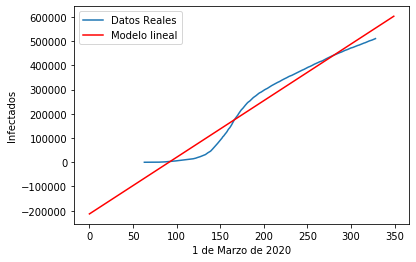

In [64]:
# Graficamos la funcion
plt.rc('font', size=10)
plt.plot(x, y, label="Datos Reales")
x_real = np.array(range(0, 350))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='red', label="Modelo lineal")
plt.legend()
plt.xlabel("1 de Marzo de 2020")
plt.ylabel("Infectados")
plt.show()

In [44]:
# Predecimos total infectados dentro de 7 dias
preducion_lineal = regr.predict([[332]])
print("Para el 28 de noviembre del 2020 los infectados rondaran los: ", int(preducion_lineal))

Para el 28 de noviembre del 2020 los infectados rondaran los:  562782


### MODELO EXPONENCIAL

In [45]:
# importamos la libreria
from scipy.optimize import curve_fit

In [46]:
# Implementamos la funcion exponencial
x1 = np.array(x, dtype=float) # transformo mi array de datos a floats 
y1 = np.array(y, dtype=float)

def modelo_exponencial(x, a, b): #funcion que permite realizar la regrecion con el modelo exponencial
    return a * np.exp(b * x) 

popt1, pcov1 = curve_fit(modelo_exponencial, x1, y1, p0=(0,0.1))
popt1

array([4.23703263e+04, 8.18255959e-03])

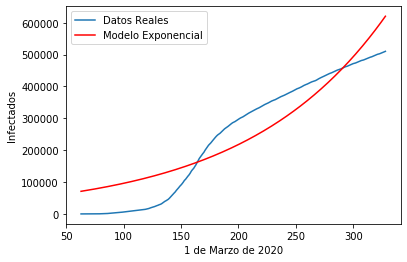

In [65]:
# Grfica del modelo exponencial
plt.rc('font', size=10)
plt.plot(x1, y1, label="Datos Reales")
plt.plot(x1, modelo_exponencial(x1, *popt1), color='red', label="Modelo Exponencial")
plt.legend()
plt.xlabel("1 de Marzo de 2020")
plt.ylabel("Infectados")
plt.show()

In [49]:
# Predecimos total infectados dentro de 7 dias
preducion_exponencial = modelo_exponencial(332, *popt1)
print("Para el 28 de Noviembre los infectados serán: ", int(preducion_exponencial))

Para el 28 de Noviembre los infectados serán:  641018


### MODELO POLINOMICO

In [50]:
# Implementamos la funcion polinomica
x2 = np.array(x, dtype=float) # transformo mi array de datos a floats 
y2 = np.array(y, dtype=float)

def modelo_polinomial(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

popt2, pcov2 = curve_fit(modelo_polinomial, x2, y2)
popt2

array([ 6.91946725e-04, -6.15648932e-01,  1.90687173e+02, -2.15205480e+04,
        7.78039605e+05])

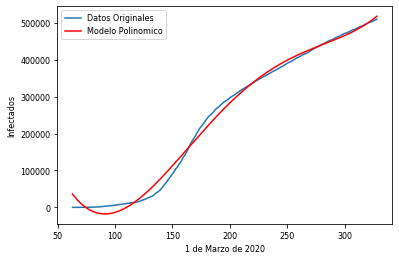

In [67]:
# Grfica del modelo polinomica
plt.rc('font', size=8)
plt.plot(x2, y2, label="Datos Originales")
plt.plot(x2, modelo_polinomial(x2, *popt2), label="Modelo Polinomico", color = 'red')
plt.legend()
plt.xlabel("1 de Marzo de 2020")
plt.ylabel("Infectados")
plt.show()

In [53]:
# Predecimos total infectados dentro de 7 dias
preducion_polinomica = modelo_polinomial(332, *popt2)
print("Los infectados para el 28 de noviembre del 2020 serán: ", int(preducion_polinomica))

Los infectados para el 28 de noviembre del 2020 serán:  528926


### MODELO LOGISTICO

In [54]:
# Agreamos la funcion logistica
x3 = np.array(x, dtype=float) # transformo mi array de datos a floats 
y3 = np.array(y, dtype=float)

def modelo_logistico(x, a, b):
    return a + b * np.log(x)

popt3, pcov2 = curve_fit(modelo_logistico, x3, y3) # Extraemos los valores de los paramatros
popt2

array([ 6.91946725e-04, -6.15648932e-01,  1.90687173e+02, -2.15205480e+04,
        7.78039605e+05])

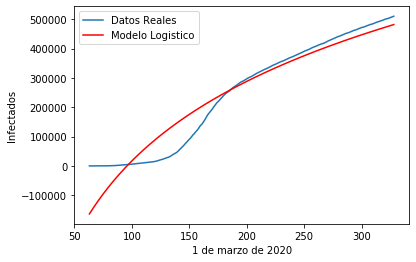

In [69]:
# Grfica del modelo logistico
plt.rc('font', size=10)
plt.plot(x3, y3, label="Datos Reales")
plt.plot(x3, modelo_logistico(x3, *popt3), label="Modelo Logistico", color="red")
plt.legend()
plt.xlabel("1 de marzo de 2020")
plt.ylabel("Infectados")
plt.show()

In [56]:
# Predecimos total infectados dentro de 7 dias
preducion_logistica = modelo_logistico(332, *popt3) 
print("Los infectados para 28 de noviembre serán: ", int(preducion_logistica))

Los infectados para 28 de noviembre serán:  486598


### MODELO PROBABILISTICO

In [57]:
# Obtenemos los nevos casos
filtro = dataset["Total"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print("MEDIA: ", media)
print("MEDIANA: ", mediana)

MEDIA:  1918.2142857142858
MEDIANA:  1665.5


In [61]:
# Predecimos total infectados dentro de 7 dias
preducion_probabilistica = int(y4[-7] + mediana)
print("Los infectados el 28 de noviembre serán: ", int(preducion_probabilistica))

Los infectados el 28 de noviembre serán:  515240


### Resultados

### Comparación entre los modelos
Modelo Lineal: 562782
Modelo Exponencial: 641018
Modelo Polinómico: 528926
Modelo Logistico: 486598
Modelo Probabilistico: 515240

Podemos concluir que el modelo de regresión probabilístico es el que tiene una mejor predicción con los datos que tenemos y puede ser usado como referencia a futuro.

## Ventajas y Desventajas

### Lineal
Es un modelo sencillo y rápido, sin embargo, este solo puede predecir en datos lineales y balanceados.

### Logistico
Es un modelo rápido como el anterior y fácil de entender, pero no puede con problemas no lineales, necesita que los datos dependan uno de los otros.

### Exponencial
Usa una curva que se ajusta a los datos reales, por lo que es un buen modelo para predecir. La desventaja es que necesita la respuesta a la tendencia.

### Polinomico
La curva al igual que el anterior se ajusta a los datos reales, y es sencillo de aplicar. La desventaja es que depende mucho del grado de precision, mientras mayor sea el gramdo mas se ajusta a los datos.

## ¿Cuál es el principal problema del Modelo Probabilístico?
Este modelo es bastante bueno con dataset pequeños, cuando se tiene valores grandes su predicción se vuelve errónea.